In [1]:
from pathlib import Path
import re
import matplotlib.pyplot as plt


In [2]:
book_path = Path("../DATA/alice_in_wonderland.txt")
raw_text = book_path.read_text(encoding="utf-8")

print(f"Length of raw text: {len(raw_text)} characters")
print("First 500 characters:")
print(raw_text[:500])

Length of raw text: 163916 characters
First 500 characters:
﻿The Project Gutenberg eBook of Alice's Adventures in Wonderland
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using


In [3]:
def strip_gutenberg(text: str) -> str:
    start_match = re.search(r"\*\*\* START OF.*\*\*\*", text)
    end_match = re.search(r"\*\*\* END OF.*\*\*\*", text)
    if start_match and end_match:
        return text[start_match.end(): end_match.start()]
    return text

clean_text = strip_gutenberg(raw_text)
print("Clean word count:", len(clean_text.split()))
print("Preview after cleaning:\n", clean_text[:500])

Clean word count: 26525
Preview after cleaning:
 

[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends in a Little Bill
 CHAPTER V.     Advice from a Caterpillar
 CHAPTER VI.    Pig and Pepper
 CHAPTER VII.   A Mad Tea-Party
 CHAPTER VIII.  The Queen’s Croquet-Ground
 CHAPTER IX.    The Mock Turtle’s Story
 CHAPTER X.     The Lobste


### Prototying ..

In [4]:
from typing import List, Dict

In [5]:
# Chunk words by size and little overlap

def chunk_by_words(text: str, size=800, overlap=100) -> List[str]:
    chunks = []
    words = text.split()

    for i in range(1, len(words), size - overlap):
        chunk = words[i: i+size]
        chunks.append(" ".join(chunk))

    return chunks

chunks = chunk_by_words(clean_text, size=800, overlap=100)

print("Num chunks:", len(chunks))
print("First chunk length (words):", len(chunks[0].split()))
print("Preview chunk 1:\n", chunks[3], ".. ")

Num chunks: 38
First chunk length (words): 800
Preview chunk 1:
 ME” were beautifully marked in currants. “Well, I’ll eat it,” said Alice, “and if it makes me grow larger, I can reach the key; and if it makes me grow smaller, I can creep under the door; so either way I’ll get into the garden, and I don’t care which happens!” She ate a little bit, and said anxiously to herself, “Which way? Which way?”, holding her hand on the top of her head to feel which way it was growing, and she was quite surprised to find that she remained the same size: to be sure, this generally happens when one eats cake, but Alice had got so much into the way of expecting nothing but out-of-the-way things to happen, that it seemed quite dull and stupid for life to go on in the common way. So she set to work, and very soon finished off the cake. * * * * * * * * * * * * * * * * * * * * CHAPTER II. The Pool of Tears “Curiouser and curiouser!” cried Alice (she was so much surprised, that for the moment she quite fo

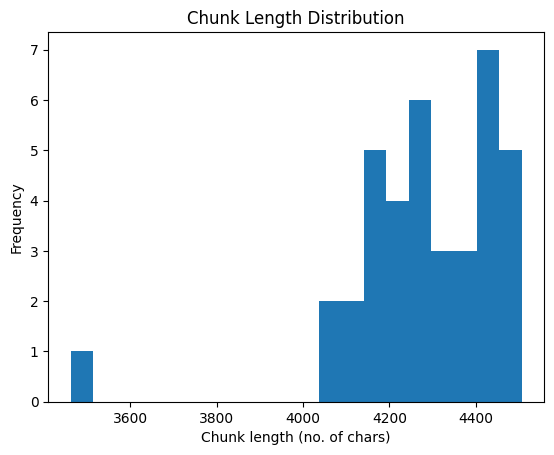

In [6]:
lengths = [len(c) for c in chunks]

plt.hist(lengths, bins=20)
plt.xlabel("Chunk length (no. of chars)")
plt.ylabel("Frequency")
plt.title("Chunk Length Distribution")
plt.show()

In [7]:
print("Min length:", min(lengths))
print("Max length:", max(lengths))
print("Avg length:", sum(lengths)/len(lengths))

Min length: 3462
Max length: 4506
Avg length: 4285.684210526316


In [8]:
# Summarize 

def dummy_summary(chunk: str) -> str:
    sentences =  chunk.split(".")
    if len(sentences) > 2:
        return sentences[1]
    else:
        return sentences[0]
    
summaries = [dummy_summary(c) for c in chunks]

for i, s in enumerate(summaries, 1):
    print(f"Chunk {i} summary: {s}\n")


Chunk 1 summary: 0 Contents CHAPTER I

Chunk 2 summary: ) Presently she began again

Chunk 3 summary:  Oh, how I wish I could shut up like a telescope! I think I could, if I only knew how to begin

Chunk 4 summary:  “Well, I’ll eat it,” said Alice, “and if it makes me grow larger, I can reach the key; and if it makes me grow smaller, I can creep under the door; so either way I’ll get into the garden, and I don’t care which happens!” She ate a little bit, and said anxiously to herself, “Which way? Which way?”, holding her hand on the top of her head to feel which way it was growing, and she was quite surprised to find that she remained the same size: to be sure, this generally happens when one eats cake, but Alice had got so much into the way of expecting nothing but out-of-the-way things to happen, that it seemed quite dull and stupid for life to go on in the common way

Chunk 5 summary:  But if I’m not the same, the next question is, Who in the world am I? Ah, _that’s_ the great puzzl

In [9]:
# Retrieval (dummy keyword search)

def keyword_search(query: str, chunks, topk=5):
    hits = [c for c in chunks if query.lower() in c.lower()]
    return hits[:topk]

query = "Advice from a Caterpillar"
results = keyword_search(query, chunks)
for r in results:
    print("--\n", r[:300], ".. ")



--
 Alice’s Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION 3.0 Contents CHAPTER I. Down the Rabbit-Hole CHAPTER II. The Pool of Tears CHAPTER III. A Caucus-Race and a Long Tale CHAPTER IV. The Rabbit Sends in a Little Bill CHAPTER V. Advice from a Caterpillar CHAPTER VI. Pig an .. 
--
 at last it sat down a good way off, panting, with its tongue hanging out of its mouth, and its great eyes half shut. This seemed to Alice a good opportunity for making her escape; so she set off at once, and ran till she was quite tired and out of breath, and till the puppy’s bark sounded quite fain .. 


In [10]:
chunks[:3]

['Alice’s Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION 3.0 Contents CHAPTER I. Down the Rabbit-Hole CHAPTER II. The Pool of Tears CHAPTER III. A Caucus-Race and a Long Tale CHAPTER IV. The Rabbit Sends in a Little Bill CHAPTER V. Advice from a Caterpillar CHAPTER VI. Pig and Pepper CHAPTER VII. A Mad Tea-Party CHAPTER VIII. The Queen’s Croquet-Ground CHAPTER IX. The Mock Turtle’s Story CHAPTER X. The Lobster Quadrille CHAPTER XI. Who Stole the Tarts? CHAPTER XII. Alice’s Evidence CHAPTER I. Down the Rabbit-Hole Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, “and what is the use of a book,” thought Alice “without pictures or conversations?” So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a da

#### Token Analysis

Avg tokens:  1059.578947368421
Max tokens: 1165


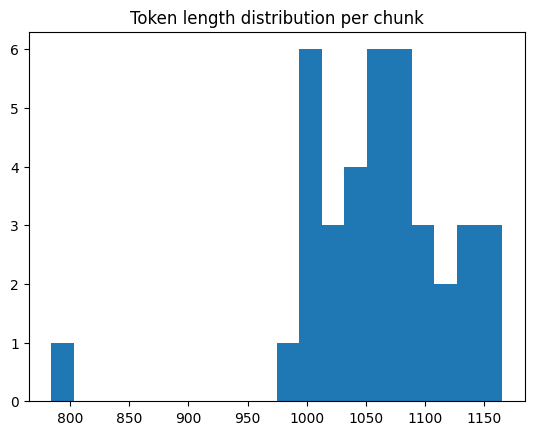

In [11]:
import tiktoken 

enc = tiktoken.get_encoding("cl100k_base")
token_lengths = [len(enc.encode(c)) for c in chunks ]

print("Avg tokens: ", sum(token_lengths)/len(token_lengths))
print("Max tokens:", max(token_lengths))

plt.hist(token_lengths, bins=20)
plt.title("Token length distribution per chunk")
plt.show()

In [12]:
### Hybrid Chunking (Using sections within the book)
#### Needs an input from the user to recognise format of the chapters. 


In [13]:
import tiktoken

enc = tiktoken.get_encoding('cl100k_base')

SPLIT_PATTERN = r"^(?:CHAPTER [IVXLCDM]+\.)\s*\n"

def split_sections(text: str):
    return re.split(SPLIT_PATTERN, text, flags=re.IGNORECASE | re.MULTILINE)

def chunk_tokens(text: str, max_tokens=1000, overlap=100):
    tokens = enc.encode(text)
    chunks = []
    for i in range(0, len(tokens), max_tokens - overlap):
        chunk = enc.decode(tokens[i:i+max_tokens])
        chunks.append(chunk)
    return chunks

def hybrid_chunk(text: str, max_tokens=1000, overlap=100):
    sections = split_sections(text=text)
    all_chunks = []
    for idx, section in enumerate(sections): 
        section_chunks = chunk_tokens(section, max_tokens, overlap)
        for cid, sub in enumerate(section_chunks):
            all_chunks.append(
                {
                    "section": idx+1,
                    "chunk_id": f"{idx+1}_{cid+1}",
                    "text": sub,
                    "n_tokens": len(enc.encode(sub)),
                    "char_len": len(sub)
                }
            )

    return all_chunks

In [14]:
hyb_chunks = hybrid_chunk(clean_text)

In [15]:
hyb_chunks

[{'section': 1,
  'chunk_id': '1_1',
  'text': '\n\n[Illustration]\n\n\n\n\nAlice’s Adventures in Wonderland\n\nby Lewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\nContents\n\n CHAPTER I.     Down the Rabbit-Hole\n CHAPTER II.    The Pool of Tears\n CHAPTER III.   A Caucus-Race and a Long Tale\n CHAPTER IV.    The Rabbit Sends in a Little Bill\n CHAPTER V.     Advice from a Caterpillar\n CHAPTER VI.    Pig and Pepper\n CHAPTER VII.   A Mad Tea-Party\n CHAPTER VIII.  The Queen’s Croquet-Ground\n CHAPTER IX.    The Mock Turtle’s Story\n CHAPTER X.     The Lobster Quadrille\n CHAPTER XI.    Who Stole the Tarts?\n CHAPTER XII.   Alice’s Evidence\n\n\n\n\n',
  'n_tokens': 159,
  'char_len': 586},
 {'section': 2,
  'chunk_id': '2_1',
  'text': 'Down the Rabbit-Hole\n\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into\nthe book her sister was reading, but it had no pictures or\nconversations in i

In [16]:
import pandas as pd

df = pd.DataFrame(hyb_chunks, columns=['section', 'chunk_id', 'text', 'n_tokens', 'char_len'])
df.head()

,section,chunk_id,text,n_tokens,char_len
0,1,1_1,\n\n[Illustration]\n\n\n\n\nAlice’s Adventures...,159,586
1,2,2_1,Down the Rabbit-Hole\n\n\nAlice was beginning ...,1000,4038
2,2,2_2,“—but I shall have to ask them what the name ...,1000,3921
3,2,2_3,"door, so she went\nback to the table, half ho...",1000,4032
4,2,2_4,the door; so either way I’ll\nget into the ga...,184,726


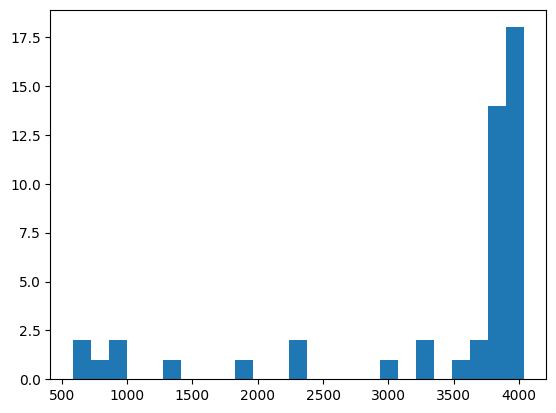

In [17]:
plt.hist(df['char_len'], bins=25)
plt.show()

In [18]:
import numpy as np 

print("Avg # chars: ", np.average(df['char_len']))
print("Avg # tokens: ", np.average(df['n_tokens']))

Avg # chars:  3355.127659574468
Avg # tokens:  857.2765957446809


In [104]:
# Retrieval (chatper/section and chunk search)

def keyword_hyb_search(query: str, hyb_chunks, topk=5) -> List[Dict]:
    hits = [c for c in hyb_chunks if query.lower() in c['text'].lower()]
    return hits[:topk]

query = "Rabbit-Hole"
results = keyword_hyb_search(query, hyb_chunks)
for r in results:
    print("--\n", r)

--
 {'section': 1, 'chunk_id': '1_1', 'text': '\n\n[Illustration]\n\n\n\n\nAlice’s Adventures in Wonderland\n\nby Lewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\nContents\n\n CHAPTER I.     Down the Rabbit-Hole\n CHAPTER II.    The Pool of Tears\n CHAPTER III.   A Caucus-Race and a Long Tale\n CHAPTER IV.    The Rabbit Sends in a Little Bill\n CHAPTER V.     Advice from a Caterpillar\n CHAPTER VI.    Pig and Pepper\n CHAPTER VII.   A Mad Tea-Party\n CHAPTER VIII.  The Queen’s Croquet-Ground\n CHAPTER IX.    The Mock Turtle’s Story\n CHAPTER X.     The Lobster Quadrille\n CHAPTER XI.    Who Stole the Tarts?\n CHAPTER XII.   Alice’s Evidence\n\n\n\n\n', 'n_tokens': 159, 'char_len': 586}
--
 {'section': 2, 'chunk_id': '2_1', 'text': 'Down the Rabbit-Hole\n\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into\nthe book her sister was reading, but it had no pictures or\nconversations in it, “and

In [20]:
## Ground Truth Data Generation


In [21]:
from string import Template
gt_prompt_template = Template(""" 
You emulate book readers with diverse reading habits. The book reader has mostly read the book and seeking to understand more 
and search content in the book.
Formulate 5 queries that a book reader might ask based on the book 'Record' content which contains the section or chapter, the block
or chunk within the section, the text block, number of tokens and character length it represents. (as shown below)

Record:

section: $section
chunk_id: $chunk_id
text: $text
n_tokens: $n_tokens
char_len: $char_len
                              
HARD CONSTRAINTS:

- Use ONLY information present in the record to form queries
- Length targets: not more than 15 words
- Vary search intent for EACH query
- Avoid repeating the same key noun/adjective across different queries; vary vocabulary.


Output exactly in this JSON format:
[
  "query_1",
  "query_2",
  "query_3",
  "query_4",
  "query_5"
]

""")

In [83]:
# Refined
from string import Template

gt_prompt_template = Template(""" 
You are emulating realistic book readers with diverse reading habits. 
The readers have mostly read the book and are now trying to recall, clarify, 
or explore details by searching within the book. 
Some are precise, some are vague, some type in full questions, 
and others use only a couple of words or short phrases.


TASK:
Formulate exactly 5 distinct search queries that such a reader might ask 
based only on the following 'Record' (a chunk of book content).

Record:

section: $section
chunk_id: $chunk_id
text: $text
n_tokens: $n_tokens
char_len: $char_len
                              
HARD CONSTRAINTS:
- Use ONLY details present in the record (no external knowledge).
- Max 15 words per query.
- Each query must sound like something a real book reader would type.
- Ensure a MIX of query STYLES and INTENT across the 5:
    • 1 short keyword-style query (2–4 words).  Occasionally, this may be purely keyword-based.
    • 1 natural-language full question.
    • 1 phrase-like query (fragment, not a full sentence).
    • 1 detail-oriented recall query (who/what/where).
    • 1 deeper reflective or interpretive query (asking about meaning, emotion, theme, or motivation).
- Avoid reusing the same key noun/adjective across queries; vary wording and style.
- At least one query must be **thoughtful and reflective** (not just factual or keyword-based).
- Queries should sound like a human reader’s questions, not summaries.
- Do NOT always output the 5 query types in the same sequence. Randomly vary the order 
  so the set looks natural and less templated.

OUTPUT FORMAT:
Return only a JSON array of 5 strings, with no extra text:
[
  "query_1",
  "query_2",
  "query_3",
  "query_4",
  "query_5"
]
""")


In [84]:
#%load_ext dotenv
%reload_ext dotenv
%dotenv

In [86]:
from openai import OpenAI
llm_client = OpenAI()

In [87]:
from tqdm.auto import tqdm
import json

def gt_generate_questions(doc):
    gt_prompt = gt_prompt_template.substitute(**doc)

    response = llm_client.chat.completions.create(
        model='gpt-4o-mini',
        messages=[{"role": "user", "content": gt_prompt}]
    )

    json_response = response.choices[0].message.content
    return json_response

In [88]:
sample_doc = hyb_chunks[7]
sample_doc

{'section': 3,
 'chunk_id': '3_3',
 'text': 'will_ be a queer thing, to be\nsure! However, everything is queer to-day.”\n\nJust then she heard something splashing about in the pool a little way\noff, and she swam nearer to make out what it was: at first she thought\nit must be a walrus or hippopotamus, but then she remembered how small\nshe was now, and she soon made out that it was only a mouse that had\nslipped in like herself.\n\n“Would it be of any use, now,” thought Alice, “to speak to this mouse?\nEverything is so out-of-the-way down here, that I should think very\nlikely it can talk: at any rate, there’s no harm in trying.” So she\nbegan: “O Mouse, do you know the way out of this pool? I am very tired\nof swimming about here, O Mouse!” (Alice thought this must be the right\nway of speaking to a mouse: she had never done such a thing before, but\nshe remembered having seen in her brother’s Latin Grammar, “A mouse—of\na mouse—to a mouse—a mouse—O mouse!”) The Mouse looked at her r

In [89]:
res = gt_generate_questions(sample_doc) or "[]"
for r in json.loads(res):
    print("-", r)

- What does Alice think about speaking to the mouse?
- O Mouse, do you know the way out of this pool?
- mouse and water
- Why does the Mouse hate cats and dogs?
- Alice seems to repeatedly offend the Mouse—what does this reveal about their interaction?


In [90]:
results = {}

In [92]:
df.count()

section     47
chunk_id    47
text        47
n_tokens    47
char_len    47
dtype: int64

In [93]:
# Generate ground truth for all chunks 
for doc in tqdm(hyb_chunks):
    doc_id = doc['chunk_id']
    if doc_id in results:
        continue
    try:
        res = gt_generate_questions(doc) or "[]"
        results[doc['chunk_id']] = json.loads(res)
    except Exception as e:
        print("Error for doc:", doc['chunk_id'], e)

100%|██████████| 47/47 [01:18<00:00,  1.68s/it]


In [94]:
results


{'1_1': ['Mad Tea-Party',
  'What happens in the Chapter IX?',
  "Alice's encounters with characters",
  'Who is the Caterpillar?',
  "What does Alice's journey symbolize?"],
 '2_1': ['falling down the rabbit-hole',
  'What does Alice think of the book without pictures?',
  'curtseying while falling',
  'Who does Alice see that makes her curious?',
  "What does Alice's curiosity reveal about her character?"],
 '2_2': ['curtseying while falling',
  'What does Alice wish for with the key?',
  "bottle with 'DRINK ME' label",
  'Who is Dinah?',
  "What does Alice's wish to be smaller symbolize?"],
 '2_3': ['Drink me label',
  'Why did Alice hesitate to drink the bottle?',
  'little glass box under the table',
  'What happens to Alice after drinking the potion?',
  "Does Alice's size affect her confidence and sense of self?"],
 '2_4': ['Which way does Alice choose?',
  'Feeling cake effects on size?',
  "Alice's expectations of life.",
  'What surprises Alice after eating?',
  'Why does she

In [97]:
with open("../DATA/GT/aiw.json", "w") as f:
    json.dump(results, f, indent=2)

In [116]:
aiw_gt = []
with open("../DATA/GT/aiw.json", "r") as f:
    res = json.load(f)

    for cid, queries in res.items():
        for q in queries:
            aiw_gt.append(
                {
                    'gold_id': cid,
                    'query': q
                }
            )

In [117]:
aiw_gt[:10]

[{'gold_id': '1_1', 'query': 'Mad Tea-Party'},
 {'gold_id': '1_1', 'query': 'What happens in the Chapter IX?'},
 {'gold_id': '1_1', 'query': "Alice's encounters with characters"},
 {'gold_id': '1_1', 'query': 'Who is the Caterpillar?'},
 {'gold_id': '1_1', 'query': "What does Alice's journey symbolize?"},
 {'gold_id': '2_1', 'query': 'falling down the rabbit-hole'},
 {'gold_id': '2_1',
  'query': 'What does Alice think of the book without pictures?'},
 {'gold_id': '2_1', 'query': 'curtseying while falling'},
 {'gold_id': '2_1', 'query': 'Who does Alice see that makes her curious?'},
 {'gold_id': '2_1',
  'query': "What does Alice's curiosity reveal about her character?"}]

In [141]:
# Evaluation

from collections import defaultdict

def hit_rate_at_k(res_ids, gold_id, k=5):
    return 1.0 if gold_id in res_ids[:k] else 0.0


def mrr_at_k(res_ids, gold_id, k=5):
    for i, res_id in enumerate(res_ids[:k], start=1):
        if res_id == gold_id:
            return 1.0 / i 
    return 0.0


def calculate_metrics(results, k_values=[5, 7]):

    if not results:
        return {f"hit_rate_at_{k}": 0.0 for k in k_values} | {f"mrr_at_{k}": 0.0 for k in k_values}
    
    metrics = defaultdict(list)

    for result in results:
        res_ids = result.get('chunk_ids')
        gold_id = result.get('gold_id')

        for k in k_values:
            metrics[f'hit_rate_at_{k}'].append(hit_rate_at_k(res_ids, gold_id, k))
            metrics[f'mrr_at_{k}'].append(mrr_at_k(res_ids, gold_id, k))

    avg_metrics = {}
    for metric, values in metrics.items():
        avg_metrics[metric] = sum(values) / len(values) if values else 0.0

    avg_metrics['total_queries'] = len(results)

    return avg_metrics
    


In [142]:
# Return search ids only
def keyword_hyb_search_ids(query: str, hyb_chunks, topk=5) -> List[Dict]:
    hits = [c['chunk_id'] for c in hyb_chunks if query.lower() in c['text'].lower()]
    return hits[:topk]

In [ ]:
results = []
for item in aiw_gt:
    gold_id = item['gold_id']
    query = item['query']

    res = keyword_hyb_search_ids(query, hyb_chunks, topk=7)
    results.append(
        {
            'gold_id': gold_id,
            'chunk_ids': res
        }
    )


In [144]:
calculate_metrics(results)

{'hit_rate_at_5': 0.00851063829787234,
 'mrr_at_5': 0.0056737588652482265,
 'hit_rate_at_7': 0.00851063829787234,
 'mrr_at_7': 0.0056737588652482265,
 'total_queries': 235}